In [39]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("social-protection.csv").dropna(axis=1)
df = df[["OBS_VALUE", "Sex", "Age", "Pacific Island Countries and territories", "INDICATOR"]]
df = df[df["Age"] != "15+"]

df.columns = ["value", "sex", "age", "island", "metric"]

df.loc[df['sex'] == 'Female', 'value'] *= -1
df.sort_values(by=["island", "age", "sex"]).head()

,value,sex,age,island,metric
25,-5.5,Female,15-24,Kiribati,SI_COV_BENFTS
3,6.3,Male,15-24,Kiribati,SI_COV_BENFTS
10,-19.5,Female,25-54,Kiribati,SI_COV_BENFTS
22,28.5,Male,25-54,Kiribati,SI_COV_BENFTS
28,-5.1,Female,55-64,Kiribati,SI_COV_BENFTS


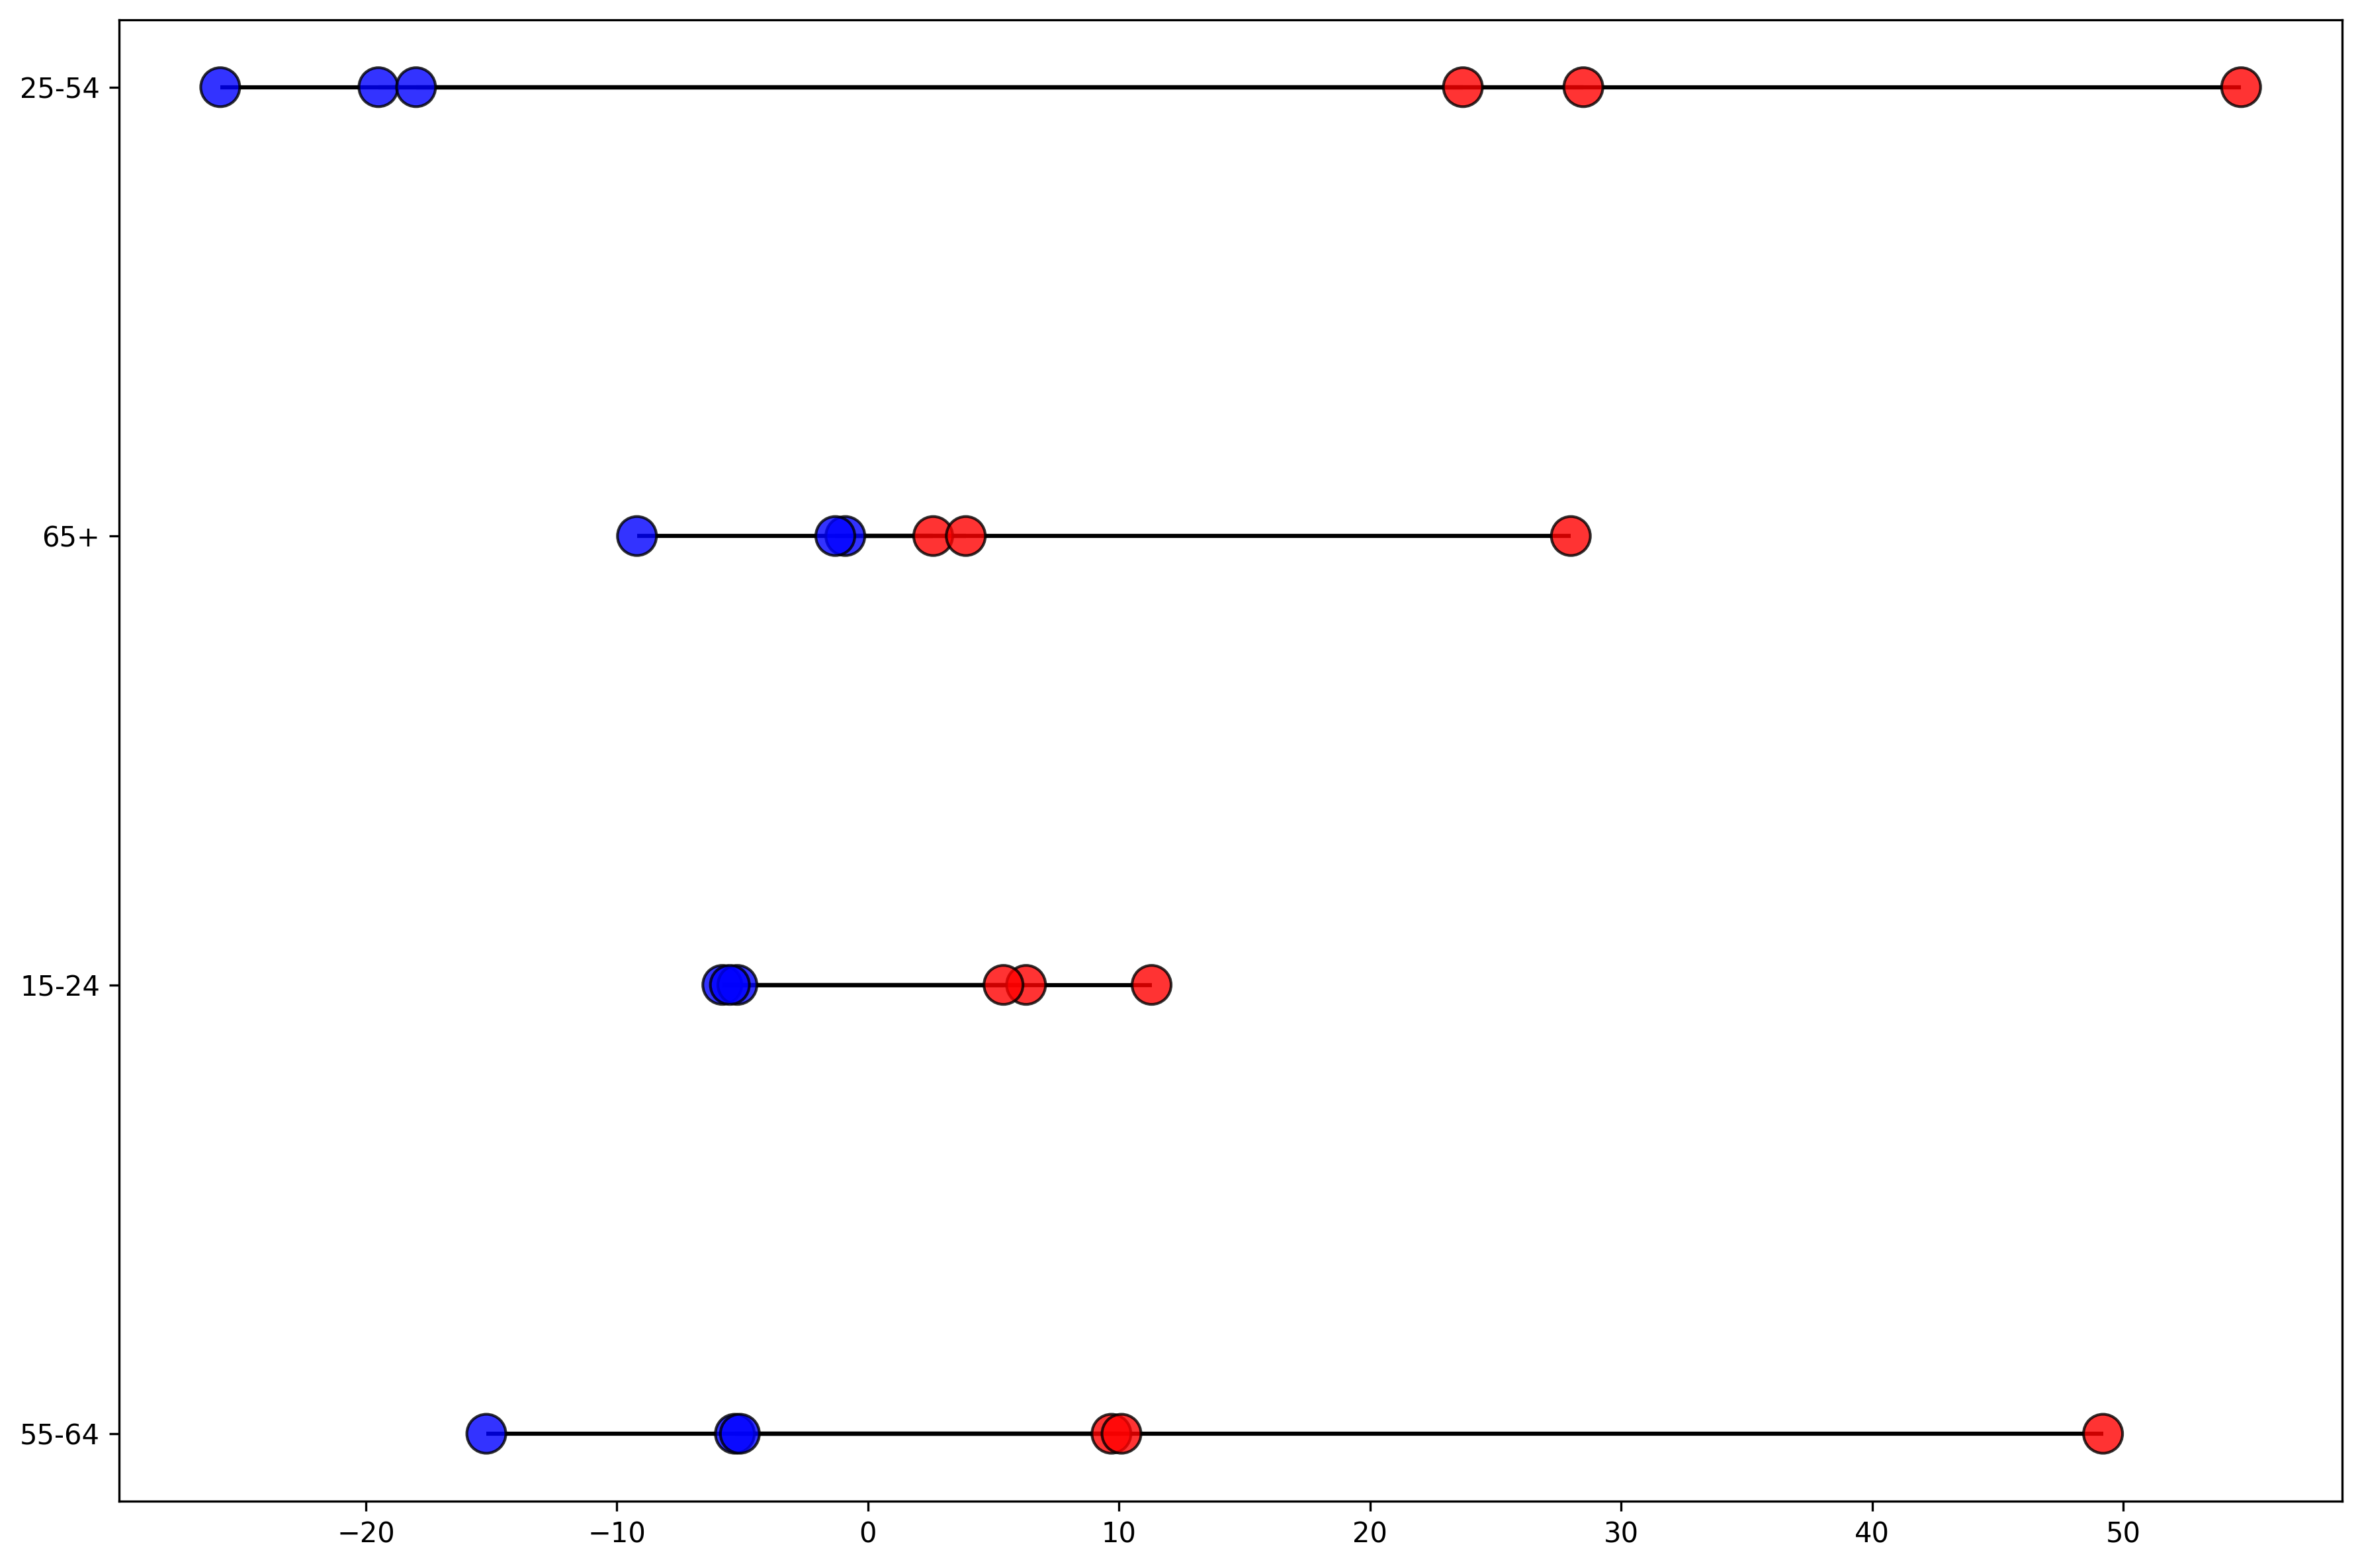

In [57]:
fig, ax = plt.subplots(figsize=(12, 8), dpi=300)

x = df['value']
y = df['age']
sex = df['sex']

# Define color mapping
color_map = {'Male': 'red', 'Female': 'blue'}
colors = sex.map(color_map).to_list()
colors
ax.hlines(y=y, xmin=0, xmax=x, color='black')
ax.scatter(x, y, c=colors, zorder=2, s=200, edgecolor='black', alpha=0.8)

plt.tight_layout()
plt.show()

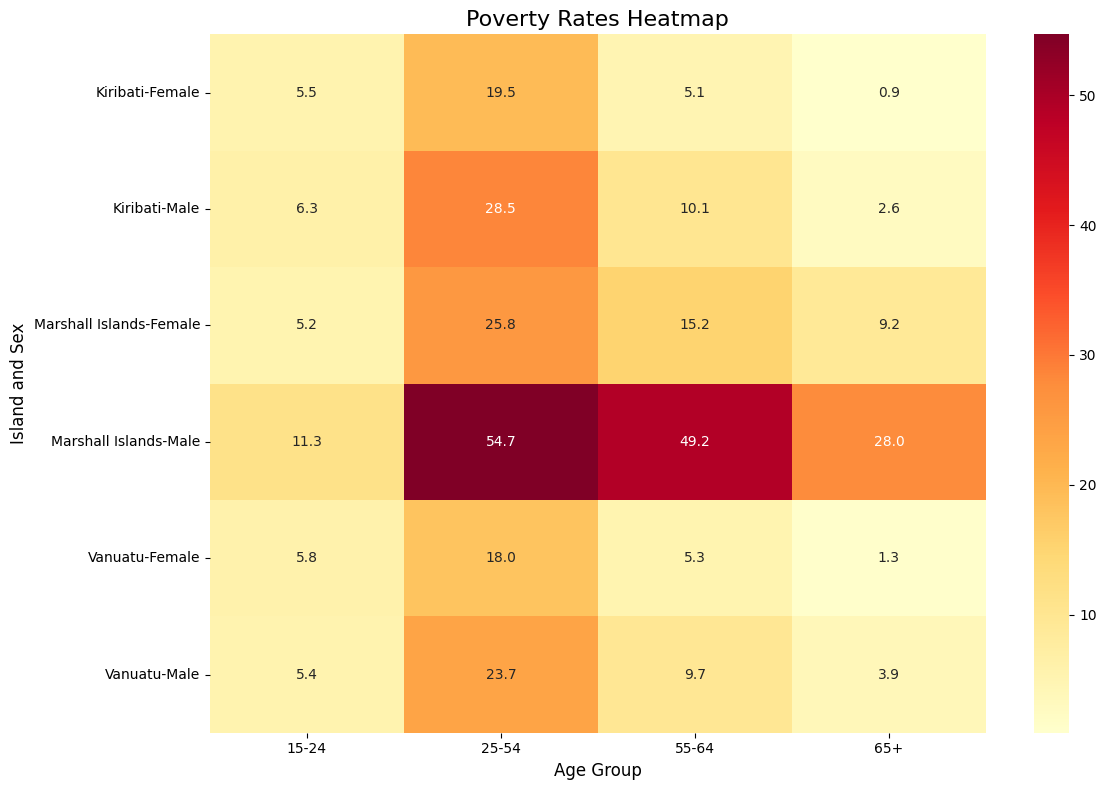

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pivot the data for the heatmap
heatmap_data = df.pivot_table(values='value', index=['island', 'sex'], columns='age', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlOrRd', fmt='.1f')
plt.title('Poverty Rates Heatmap', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Island and Sex', fontsize=12)
plt.tight_layout()
plt.show()